## Observations and Insights 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = study_results.merge(mouse_metadata, on = "Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [58]:
#Dropping duplicate rows

#Find duplicate rows indicated by boolean series
dups_bool = combined_data.duplicated(subset=['Mouse ID','Timepoint'])

#Add duplicate boolean series to data frame 
bool_combined_data = combined_data
bool_combined_data["Duplicates"]= dups_bool

#Select rows with "False" in the 'Duplicates' column. That is will be the cleaned data
clean_data = bool_combined_data[~bool_combined_data['Duplicates']]
clean_data = clean_data.drop(['Duplicates'],axis = 1)
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [60]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [61]:
# Create Summary Data Frame


#Condense data frame to two columns we are intested in (Drug Regimen and Tumor Volume)
codensed_df = clean_data.loc[:,['Drug Regimen','Tumor Volume (mm3)']]

#Calculate mean, median, standard deviation, and standard error for each drug
summary_df = codensed_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [np.mean, np.median,np.std, st.sem]})

# Format to 2 decimal places
for header in summary_df:
    summary_df[header]=summary_df[header].apply('{:.2f}'.format)

summary_df


Tumor Volume (mm3)                   
                           mean median   std   sem
Drug Regimen                                      
Capomulin                 40.68  41.56  4.99  0.33
Ceftamin                  52.59  51.78  6.27  0.47
Infubinol                 52.88  51.82  6.57  0.49
Ketapril                  55.24  53.70  8.28  0.60
Naftisol                  54.33  52.51  8.13  0.60
Placebo                   54.03  52.29  7.82  0.58
Propriva                  52.39  50.91  6.57  0.53
Ramicane                  40.22  40.67  4.85  0.32
Stelasyn                  54.23  52.43  7.71  0.57
Zoniferol                 53.24  51.82  6.97  0.52

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [62]:
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [142]:
#Create series of total measurements for each drug 

#Create series of total measurments of each drug
total_meas_series = clean_data['Drug Regimen'].value_counts()

#Identify list of drugs in study and how many measurements as x and y values respectively for bar plot
x_drug_regimen_list = total_meas_series.index.values.tolist()
y_drug_meas_list = total_meas_series.values.tolist()


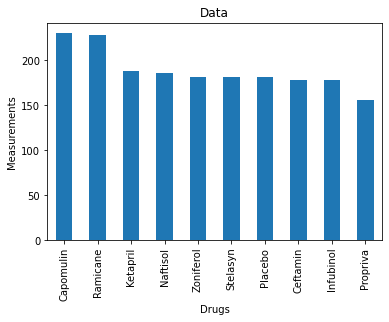

In [126]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using DataFrame.plot.

#Make bar plot with title
drug_meas_graph = total_meas_series.plot(kind = 'bar',title = "Data")

#Change x and y labels
drug_meas_graph.set_xlabel("Drugs")
drug_meas_graph = drug_meas_graph.set_ylabel("Measurements")


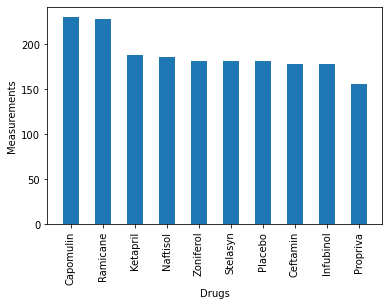

In [141]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Make the bar plot with title and identical width
drug_meas_graph2 = plt.bar(x_drug_regimen_list,y_drug_meas_list,width=.5)

#Rotate the x values 
drug_meas_graph2 = plt.xticks(x_drug_regimen_list,rotation = 'vertical')

#Change x and y labels
drug_meas_graph2 = plt.xlabel('Drugs')
drug_meas_graph2 = plt.ylabel('Measurements')

In [143]:
#Create data frame of total measurements for each drug 



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
